In [74]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load, low_memory=False, encoding="UTF-8")
ride_data = pd.read_csv(ride_data_to_load, low_memory=False, encoding="UTF-8")

# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, how="outer", on="city")

# Display the data table for preview
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [26]:

#combined_data["ride_id"].count()

#combined_data["driver_count"].sum()

combined_data["type"].value_counts()

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [54]:
# Obtain the x and y coordinates for each of the three city types
#x coordinate = count_rides_city
#y coordinate = avg_fare_city
urban_city = combined_data[combined_data["type"] == "Urban"]

rural_city = combined_data[combined_data["type"] == "Rural"]

suburban_city = combined_data[combined_data["type"] == "Suburban"]


count_rides_urban = urban_city.groupby("city").count()["ride_id"]
count_rides_rural = rural_city.groupby("city").count()["ride_id"]
count_rides_suburban = suburban_city.groupby("city").count()["ride_id"]




avg_fare_urban = urban_city.groupby("city").mean()["fare"]
avg_fare_rural = rural_city.groupby("city").mean()["fare"]
avg_fare_suburban= suburban_city.groupby("city").mean()["fare"]



count_drivers_urban =  urban_city.groupby("type").mean()["driver_count"]
count_drivers_rural =  rural_city.groupby("type").mean()["driver_count"]
count_drivers_suburban =suburban_city.groupby("type").mean()["driver_count"]




#City Type (Urban, Suburban, Rural)
#city_type = combined_data["type"].value_counts()

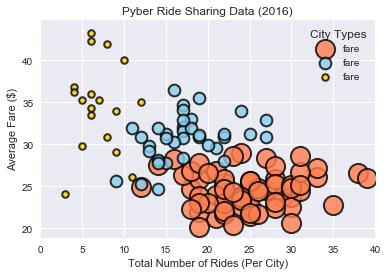

In [73]:
#x = count_rides_city
#y = avg_fare_city
#s = count_drivers_city


plt.scatter(count_rides_urban, avg_fare_urban, s=count_drivers_urban*10, marker = "o", color="coral", alpha=.8, edgecolors="black", linewidth=2)
plt.scatter(count_rides_suburban, avg_fare_suburban, s=count_drivers_suburban*10, marker = "o",color= "skyblue", alpha=.8, edgecolors="black", linewidth=2)
plt.scatter(count_rides_rural, avg_fare_rural, s=count_drivers_rural*10 ,marker = "o", color="gold", alpha=.8, edgecolors="black", linewidth=2)




plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

plt.xlim(0,40)
plt.grid
plt.legend(loc="best", fontsize="small", mode="expanded", title= "City Types")

plt.show()



#Needs Categorical Color Conditioning for each city_tpye

#Gold - Rural 
#Light Sky Blue- suburbran
#Light Coral - Urban

#city_type_array = combined_data["type"].values

## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


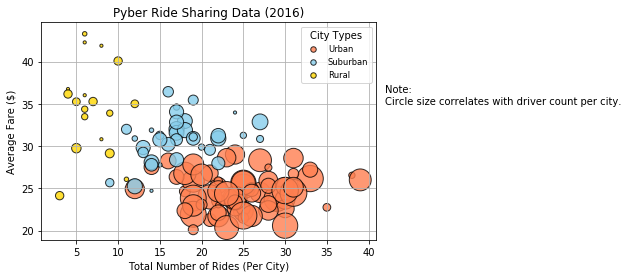

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

In [67]:
per_type_fare = combined_data.groupby(["type"]).sum()["fare"]/combined_data["fare"].sum() * 100


#total drivers
per_type_drivers = combined_data.groupby(["type"]).sum()["driver_count"]/combined_data["driver_count"].sum()*100


#total rides

per_type_rides =combined_data.groupby(["type"]).count()["ride_id"]/combined_data["ride_id"].count()*100

print(f"Per_Type fair : {per_type_fare}")

print(f"Per_Type Rides : {per_type_rides }")

print(f"Per_Type Drivers : {per_type_drivers }")

Per_Type fair : type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64
Per_Type Rides : type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64
Per_Type Drivers : type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64


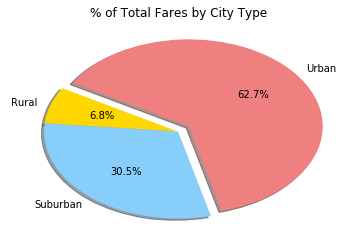

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


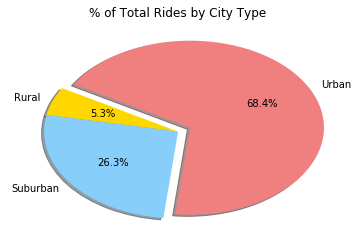

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


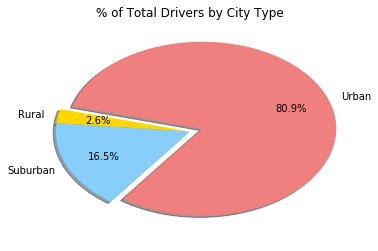

In [6]:
# Show Figure
plt.show()